In [106]:
import numpy as np
import matplotlib.pyplot as plt

In [175]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import hsv_to_rgb

функции для отрисовки границы и для переходов между системами координат

In [107]:
m=1000
def mas_r(fi):
    r=np.zeros(m)
    for i in range(m):
        for n in range(400):
            if (r[i])<1.5*(np.cos(fi[i]/4+np.pi*n/2)):
                r[i]=1.5*((np.cos(fi[i]/4+np.pi*n/2)))
    return r


In [108]:
def polar_in_dsk(m,r,fi):
    x=np.zeros(m)
    y=np.zeros(m)
    for i in range(m):
        x[i]=r[i]*np.cos(fi[i])
        y[i]=r[i]*np.sin(fi[i])
    return x,y

def dsk_in_polar(m,x,y):
    r=np.zeros(m)
    fi=np.zeros(m)
    for i in range(m):
        r[i]=np.sqrt(x[i]**2+y[i]**2)

        if x[i]>0:
            fi[i]=np.arctan(y[i]/x[i])
        if x[i]<0 and y[i]>0:
            fi[i]=np.pi+np.arctan(y[i]/x[i])
        if x[i]<0 and y[i]<0:
            fi[i]=-np.pi+np.arctan(y[i]/x[i])
        if x[i]==0 and y[i]<0:
            fi[i]=-np.pi/2
        if x[i]==0 and y[i]>0:
            fi[i]=np.pi/2
        
    return r,fi

№1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


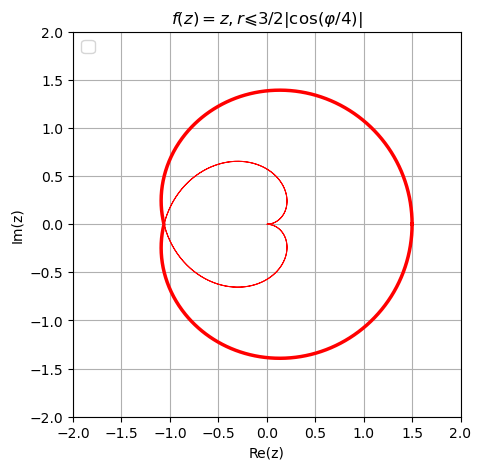

In [109]:
plt.figure(figsize=(5,5))
fi=np.linspace(0, 2*np.pi,m)
r=mas_r(fi)
fi1=np.linspace(0, 8*np.pi,m)
x1=1.5*abs(np.cos(fi1/4))*np.cos(fi1)
y1=1.5*abs(np.cos(fi1/4))*np.sin(fi1)
x,y=polar_in_dsk(m,r,fi)

plt.plot(x1,y1,color='red',lw=0.75)

plt.plot(x,y,color='red',lw=2.5)


plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.title(r'$f(z)=z , r\leqslant3/2|\cos(\varphi/4)|$')
plt.ylim(bottom=0)
plt.legend(loc=2, prop={'size':12})
ax = plt.gca()
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.grid()

функция, вычисляющая координаты в новой сетке U,V W(x,y)=U(x,y)+iV(x,y)

In [111]:
def image(m,x,y):
    u=np.zeros(m)
    v=np.zeros(m)
    for i in range(m):
        u[i]=(-2*x[i]**2+5*x[i]-2-2*y[i]**2)/((x[i]-2)**2+y[i]**2)
        v[i]=(3*y[i])/((x[i]-2)**2+y[i]**2)
    return u, v

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


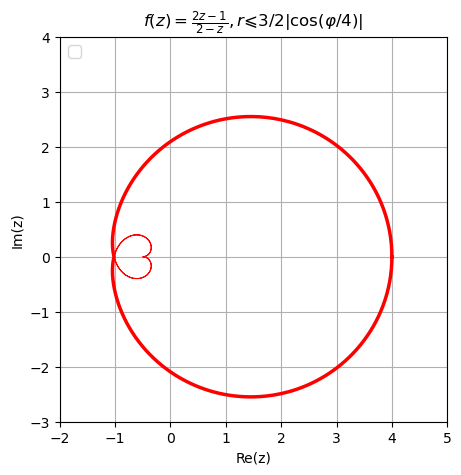

In [112]:
plt.figure(figsize=(5,5))
u, v=image(m,x,y)
u1, v1=image(m,x1,y1)
plt.plot(u1,v1,color='red',lw=0.75)

plt.plot(u,v,color='red',lw=2.5)


plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.title(r'$f(z)=\frac{2z-1}{2-z} , r\leqslant3/2|\cos(\varphi/4)|$')
plt.ylim(bottom=0)
plt.legend(loc=2, prop={'size':12})
ax = plt.gca()
plt.xlim(-2,5)
plt.ylim(-3,4)
plt.grid()

Так как не сказано какую ортогональную систему координат выбирать, выберем полярную.

Для неё построим сетку в ручную по точкам и отобразим


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


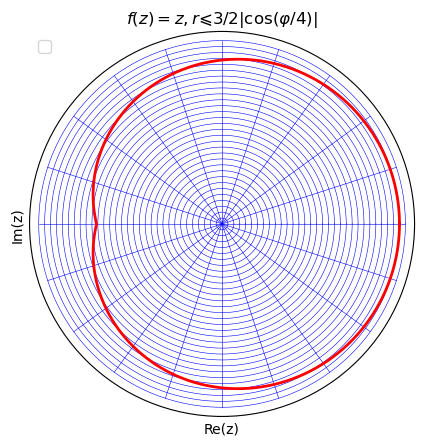

In [113]:
plt.figure(figsize=(5,5))
fi=np.linspace(0,2*np.pi,m)
r=np.linspace(0,1.55,200)
for i in range(20):
     teta=np.linspace(i*np.pi/10,i*np.pi/10,200)
     plt.polar(teta,r,color='blue',lw=0.4)
for i in range(32):
    r1=np.linspace(i*0.05, i*0.05, m)
    plt.polar(fi,r1,color='blue',lw=0.4)

omega=np.linspace(0, 2*np.pi,m)
r=mas_r(omega)
plt.polar(omega,r,color='red',lw=2)


plt.xticks([])
plt.yticks([])

plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.title(r'$f(z)=z , r\leqslant3/2|\cos(\varphi/4)|$')
plt.ylim(bottom=0)
plt.legend(loc=2, prop={'size':12})
ax = plt.gca()


Text(0.5, 1.0, '$f(z)=\\frac{2z-1}{2-z} , r\\leqslant3/2|\\cos(\\varphi/4)|$')

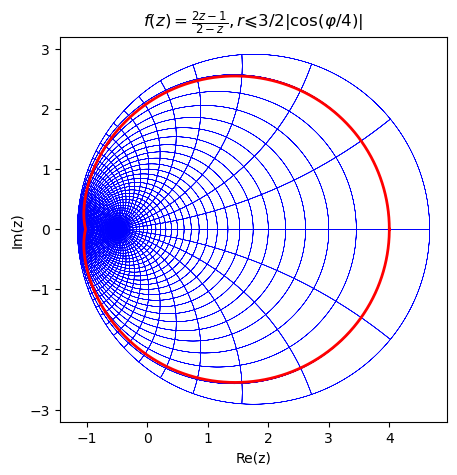

In [114]:
plt.figure(figsize=(5,5))
m=15000
fi=np.linspace(0,8*np.pi,m)
h=4000
for i in range(32):
    r1=np.linspace(i*0.05, i*0.05, m)
    x,y=polar_in_dsk(m,r1,fi)
    u,v=image(m,x,y)
    plt.plot(u,v,color='blue',lw=0.3)
r=np.linspace(0,1.55,h)
for i in range(500):
     teta=np.linspace(i*np.pi/35,i*np.pi/35,h)
     x,y=polar_in_dsk(h,r,teta)
     u,v=image(h,x,y)
     plt.plot(u,v,color='blue',lw=0.3)

omega=np.linspace(0, 2*np.pi,m)
r=mas_r(omega)
x,y=polar_in_dsk(m,r,omega)
u,v=image(m,x,y)
plt.plot(u,v,color='red',lw=2)

plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.title(r'$f(z)=\frac{2z-1}{2-z} , r\leqslant3/2|\cos(\varphi/4)|$')

видно, что сетка из лучей и окружностей перешла в сетку из окружностей и окружностей

№2

функции для определения границ в полярных координатах

In [176]:
def mas_r_inf(fi):
    r=np.zeros(m)
    for i in range(m):
        for n in range(400):
            if (r[i])<0.25*(np.cos(fi[i]/4+np.pi*n/2)):
                r[i]=0.25*((np.cos(fi[i]/4+np.pi*n/2)))
    return r

def mas_r_sup(fi):
    r=np.zeros(m)
    for i in range(m):
        for n in range(400):
            if abs(r[i])<1.5*abs(np.cos(2*fi[i]/3+4*np.pi*n/3)):
                r[i]=1.5*abs((np.cos(2*fi[i]/3+4*np.pi*n/3)))
    return r

def Hcomplex(z):
    H = np.angle(z) / (2*np.pi) + 1
    return np.mod(H, 1)
def g(x):
    return (1- 1/(1+x**2))**0.2


In [187]:
plt.figure(figsize=(5,5))
m=3000
plt.figure(figsize=(5,5))
fi=np.linspace(0, 6*np.pi,m)
r_inf=mas_r_inf(fi)
x,y=polar_in_dsk(m,r_inf,fi)

r_sup=mas_r_sup(fi)
x,y=polar_in_dsk(m,r_sup,fi)


<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

In [188]:
mas_rad=np.zeros((m,m))
mas_teta=np.zeros((m,m))
x_fi=np.zeros((m,m))
y_fi=np.zeros((m,m))
for i in range(m):
    mas_rad[i]=np.linspace(r_inf[i], r_sup[i], m)
    mas_teta[i]=np.linspace(fi[i], fi[i], m)
    x_fi[i],y_fi[i]=polar_in_dsk(m,mas_rad[i],mas_teta[i])



Раскрашенная область:

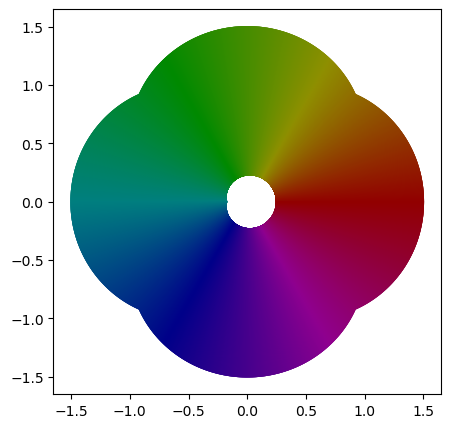

In [189]:
plt.figure(figsize=(5,5))
rgb=list()
for i in range(m):
    z=0
    z = x_fi[i][0] + 1j*y_fi[i][0]
    H = Hcomplex(z)
    V = g(np.absolute(z))
    S=1
    HSV = np.dstack((H, S, V))
    RGB = hsv_to_rgb(HSV)
    rgb.append((RGB[0][0][0],RGB[0][0][1],RGB[0][0][2]))
    plt.plot(x_fi[i],y_fi[i],color=rgb[i],lw=1)


Это образ области из второго номера для f(z) из первого номера

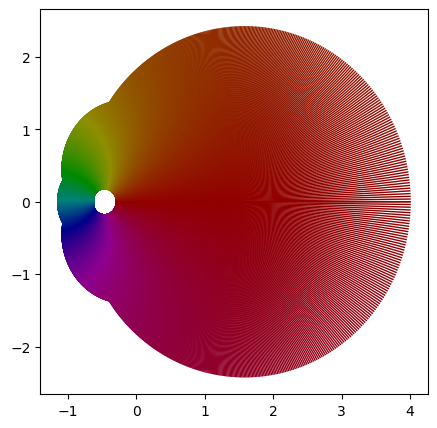

In [190]:
plt.figure(figsize=(5,5))
for i in range(m):
    u,v=image(m,x_fi[i],y_fi[i])
    plt.plot(u,v,color=rgb[i],lw=1)


а это для g(z) из второго номера

In [193]:
def image1(m,x,y):
    u=np.zeros(m)
    v=np.zeros(m)
    for i in range(m):
        u[i]=np.sin(x[i]/2)*np.cosh(y[i]/2)
        v[i]=np.cos(x[i]/2)*np.sinh(y[i]/2)
    return u, v

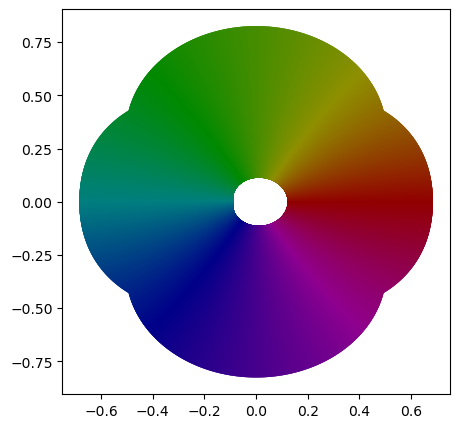

In [194]:
plt.figure(figsize=(5,5))
for i in range(m):
    u,v=image1(m,x_fi[i],y_fi[i])
    plt.plot(u,v,color=rgb[i],lw=1)